In [1]:
from pprint import pprint

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from twitpol import config, utils

%load_ext autoreload
%autoreload 2

In [2]:
data = pd.read_csv(config.DATA / 'collocation' / 'collocation_matrix.csv', index_col=0).values

In [3]:
display_data = np.zeros_like(data)
annot_data = np.zeros_like(data)
for i in range(data.shape[0]):
    annot_i = []
    for j in range(data.shape[1]):
        if i == j:
            display_data[i, j] = 0
            annot_data[i, j] = data[i, j]
        else:
            display_data[i, j] = data[i, j] / data[i, i]
            annot_data[i, j] = display_data[i, j]

In [4]:
cand_names = config.CANDIDATES

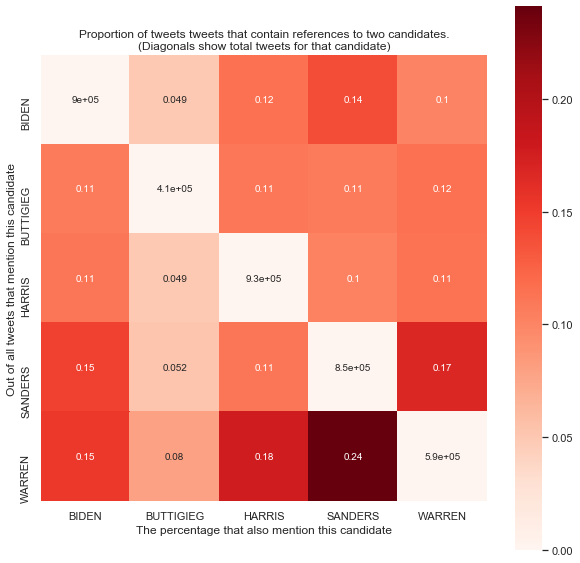

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(display_data, cmap='Reds', annot=annot_data, square=True, xticklabels=cand_names, yticklabels=cand_names)
ax.set_ylim(5, 0)
ax.set_xlim(0, 5)
plt.title("Proportion of tweets tweets that contain references to two candidates.\n(Diagonals show total tweets for that candidate)")
ax.set_ylabel("Out of all tweets that mention this candidate")
ax.set_xlabel("The percentage that also mention this candidate")
plt.savefig(config.FIGS / 'collocation' / 'collocation_matrix.png')
plt.show()